\begin{align*}
X + Y &{\quad \stackrel{1} \longrightarrow \quad} B_2 \\
X + B_2 &{\quad \stackrel{1} \longrightarrow \quad} X + X + X \\
Y + B_2 &{\quad \stackrel{1} \longrightarrow \quad} Y + Y + Y \\
\end{align*}

In [13]:
%matplotlib inline

from crn_utils import SimulationOptions, run_simulation
import numpy as np
import plotting_utils as plt_utils

simulation_options = SimulationOptions()
simulation_options.set_java_path("/home/harry/.jdks/openjdk-19.0.1/bin/java")
simulation_options.set_max_time(2000)

In [14]:
import importlib
importlib.reload(plt_utils)

<module 'plotting_utils' from '/home/harry/IdeaProjects/crn-attempt1/graphing/plotting_utils.py'>

In [15]:
simulation_options.net_from_file("./nets/heavy-b.json")
simulation_options.set_repeats(500)
simulation_options.set_volumes([int(volume) for volume in np.logspace(2.0, 4.0, 10)])
simulation_options.use_file(True, "./csvs/heavy-b.csv")
simulation_options.set_format("csv")
simulation_options.set_dtype({"B2": "int16", "X": "int16", "Y": "int16", "time": "float64", "volume": "int16", "repeatNum": "int16"})

DATA = run_simulation(simulation_options)
places = DATA.columns.difference(["repeatNum", "time", "volume"])
DATA["isFinal"] = DATA.time.eq(DATA.groupby(['volume','repeatNum']).time.transform('max'))


Execution and deserialization took: 2s
Rows/second: 10951136.230437998
Memory info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29121904 entries, 0 to 29121903
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   B2         int16  
 1   X          int16  
 2   Y          int16  
 3   time       float64
 4   volume     int16  
 5   repeatNum  int16  
dtypes: float64(1), int16(5)
memory usage: 499.9 MB
None


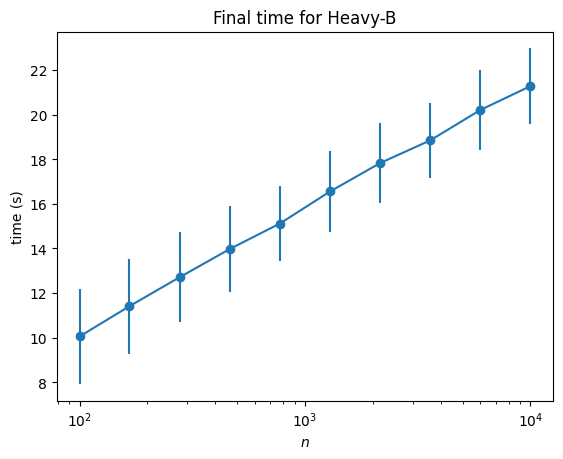

In [16]:
plt_utils.final_time_graph(DATA, "Heavy-B")

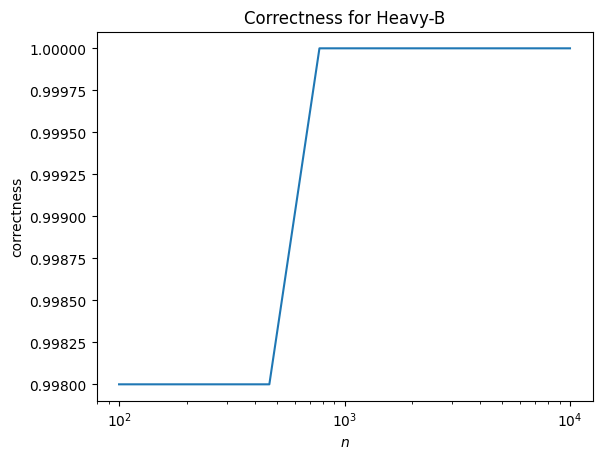

In [17]:
plt_utils.correctness_graph(DATA, "X", "Y", "Heavy-B")

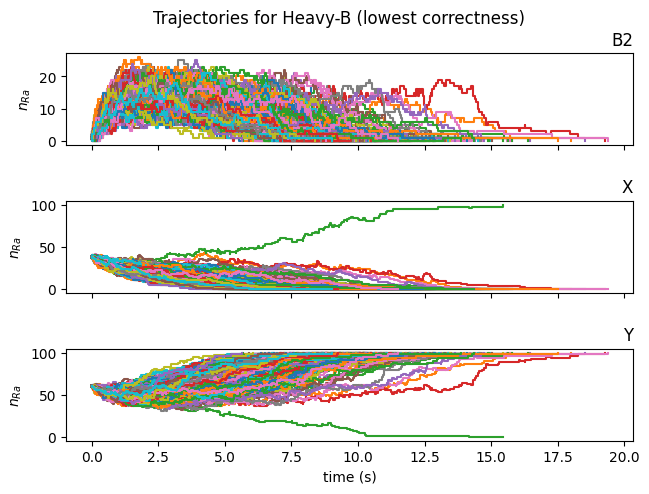

In [18]:
plt_utils.lowest_correctness_trajectory(DATA, "X", "Y", "Heavy-B")

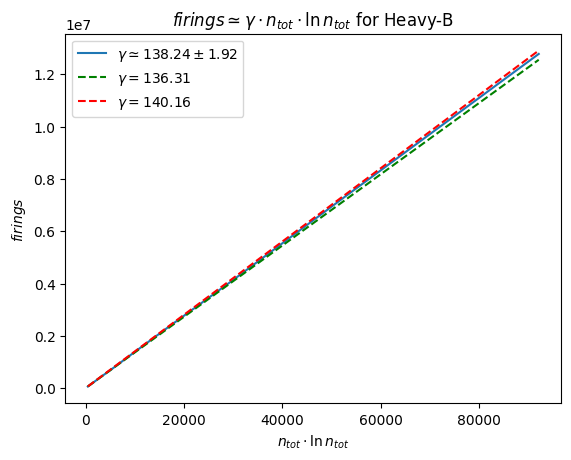

In [19]:
plt_utils.firing_gamma_graph(DATA, "Heavy-B")